In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

In [6]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### 1.2.Import

In [1]:
import numpy as np # for scientific computing
import pandas as pd # a fundamental and powerful package for data analysis and manipulation
import seaborn as sns # seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import pyreadstat # for reading .sav file
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, LeaveOneOut, train_test_split # for separating train and test data, scaling, model building, ...
from scipy import stats # it contains a large number of statistics, probability distributions functions
import matplotlib.pyplot as plt # matplotlib is a library to plot graphs in Python
from sklearn.impute import KNNImputer # Imputation for completing missing values using k-Nearest Neighbors
from sklearn.experimental import enable_iterative_imputer # Enables IterativeImputer. The API and results of this estimator might change without any deprecation cycle
from sklearn.impute import IterativeImputer # Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion
from sklearn.ensemble import RandomForestClassifier # A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
from boruta import BorutaPy # Boruta is an all relevant feature selection method, while most other are minimal optimal; this means it tries to find all features carrying information usable for prediction, rather than finding a possibly compact subset of features on which some classifier has a minimal error
from imblearn.over_sampling import SMOTE # Implementation of SMOTE - Synthetic Minority Over-sampling Technique
from collections import Counter # A Counter is a container that keeps track of how many times equivalent values are added
from sklearn.metrics import plot_confusion_matrix # plot confusion matrix
from sklearn.metrics import accuracy_score # Accuracy classification score

## 2.Exploring Data

### 2.1.Load Data

In [87]:
# reading data as a data frame
df = pd.DataFrame(pd.read_spss("../data/secom_mod.sav"))
# setting ID as the index
df = df.set_index('ID')
# getting the types and shapes of the dataset
print(df.info(),"\n")
print(df.dtypes)
df.shape 

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1567 entries, 1.0 to 1567.0
Columns: 592 entries, class to feature590
dtypes: float64(591), object(1)
memory usage: 7.1+ MB
None 

class         float64
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object


(1567, 592)

In [67]:
# have a look at the first five rows of dataset
df.head()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
2.0,0.0,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
3.0,1.0,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4.0,0.0,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
5.0,0.0,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


### 2.4.Pass / Fail Ratio

In [70]:
# number of pass and fail values
df['class'].value_counts()

pass    1472
fail      95
Name: class, dtype: int64

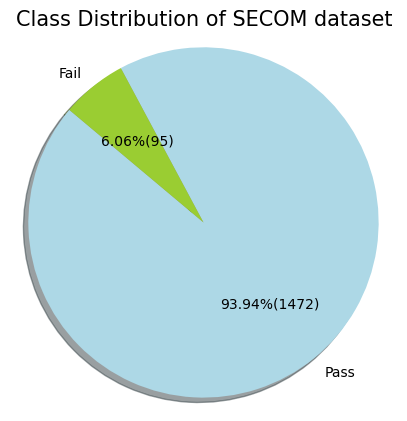

In [76]:
# pie chart of the target variable
def ClassDistributionGraph(df, title):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    
    labels = ['Pass', 'Fail']
    distribution = df.value_counts()
    colors = ['lightblue', 'yellowgreen']

    # Plot
    plt.pie(distribution, labels=labels, colors=colors, autopct= lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*distribution.sum()), shadow=True, startangle=140,)
    plt.title(title, fontsize=15)
    plt.axis('equal')
    plt.show()

ClassDistributionGraph(df['class'], 'Class Distribution of SECOM dataset')

### 2.5.Histogram of some of the features

23 9 8 3


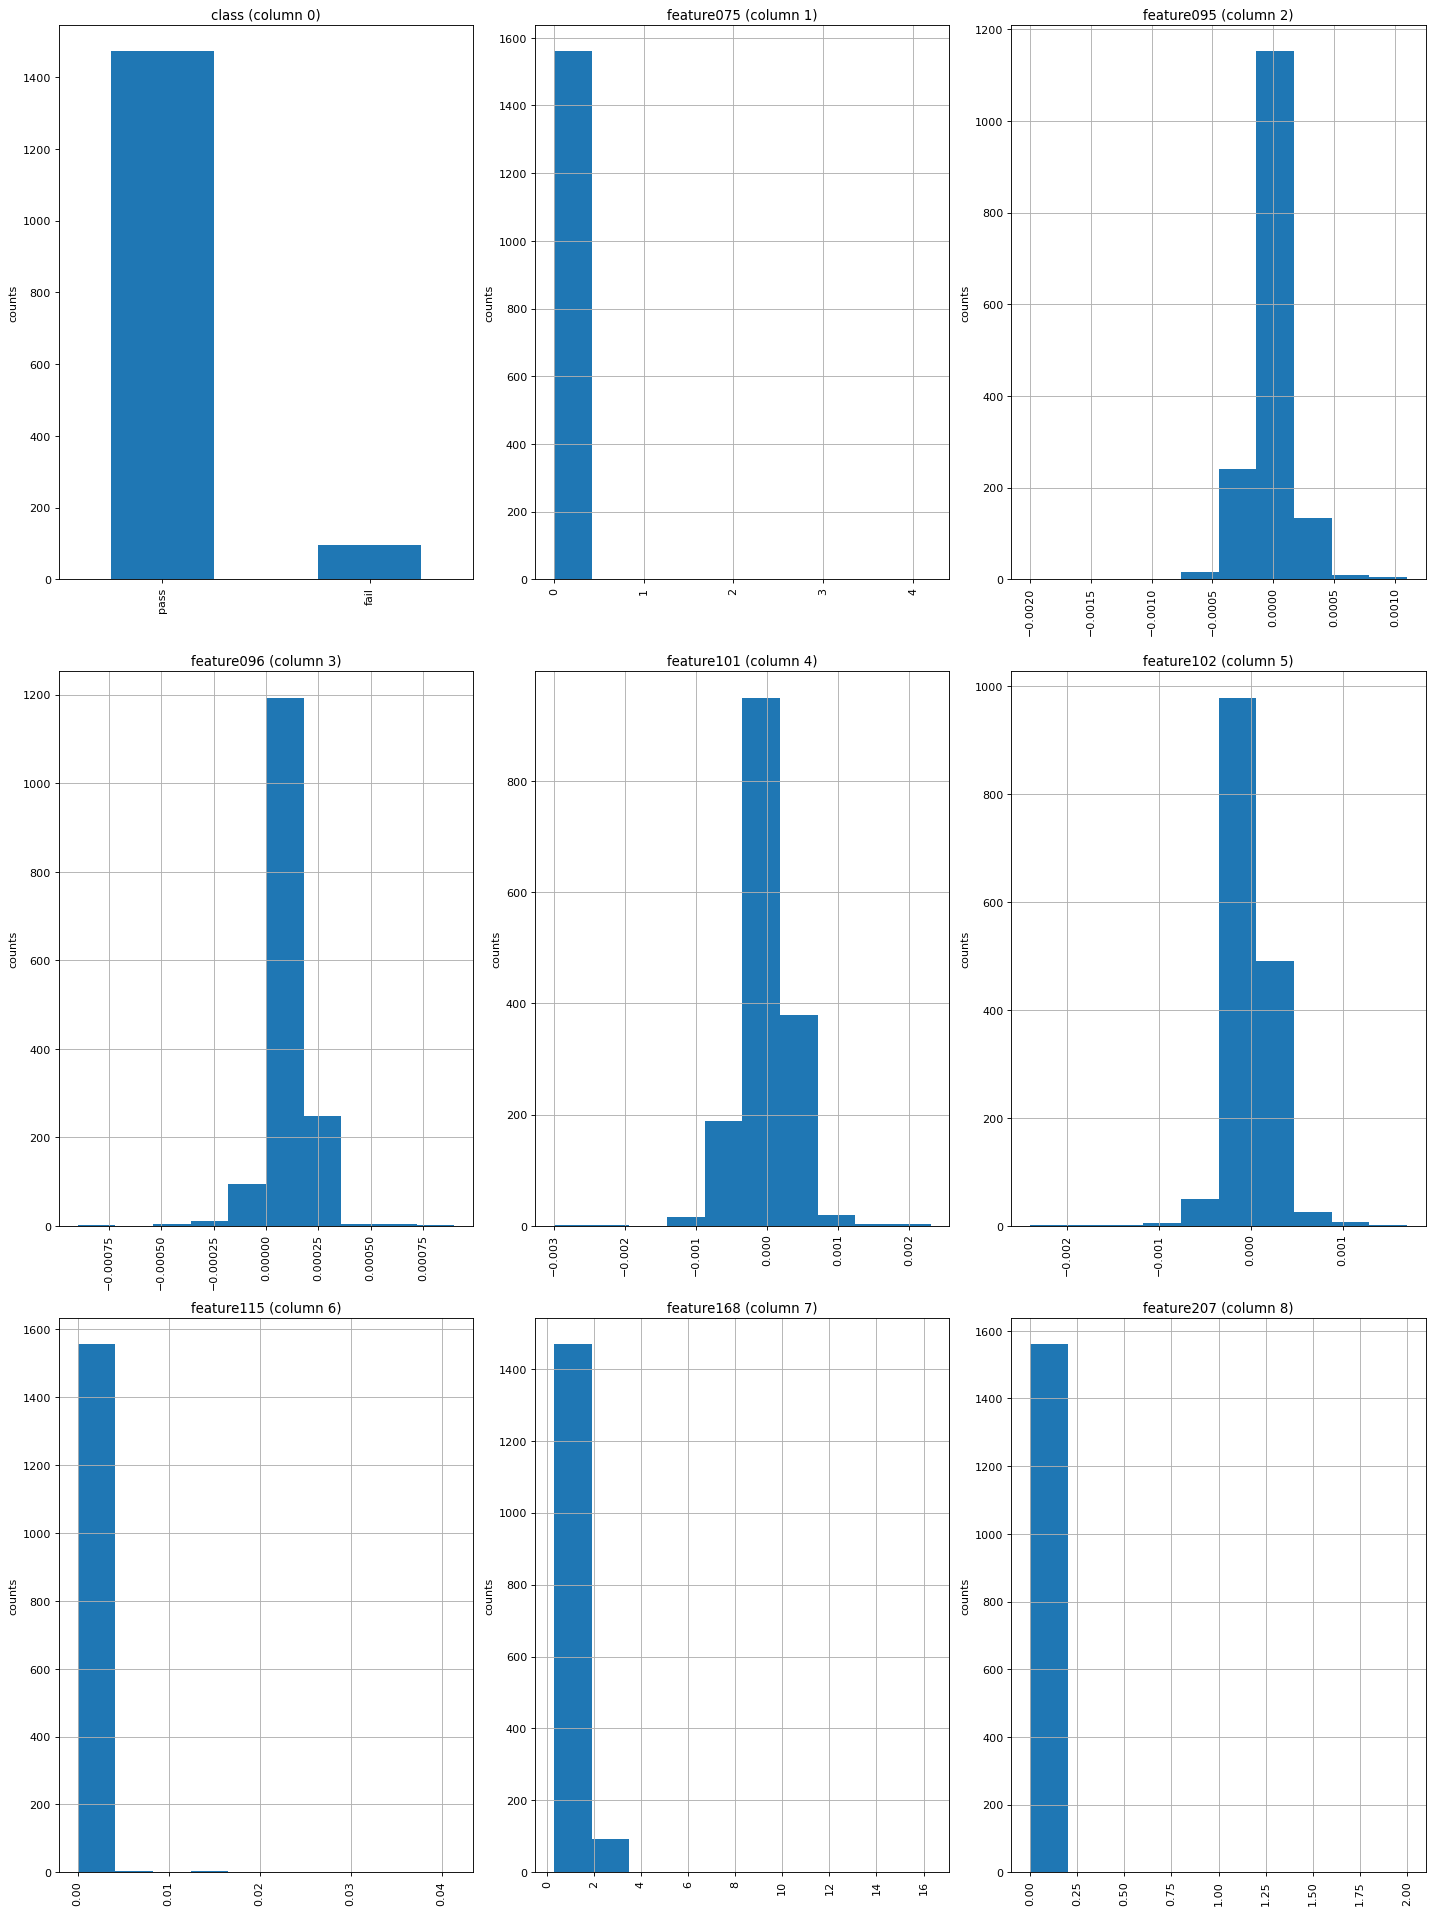

In [77]:
# random features
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
 
    
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    %matplotlib inline
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
   
    print(nCol, nGraphShown, nGraphRow, nGraphPerRow)
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df, 9, 3)

### 2.6.Univariate Analysis

In [78]:
# a summary of statistics pertaining to the DataFrame columns
df.describe()

,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,feature010,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


### 2.7.Correlation

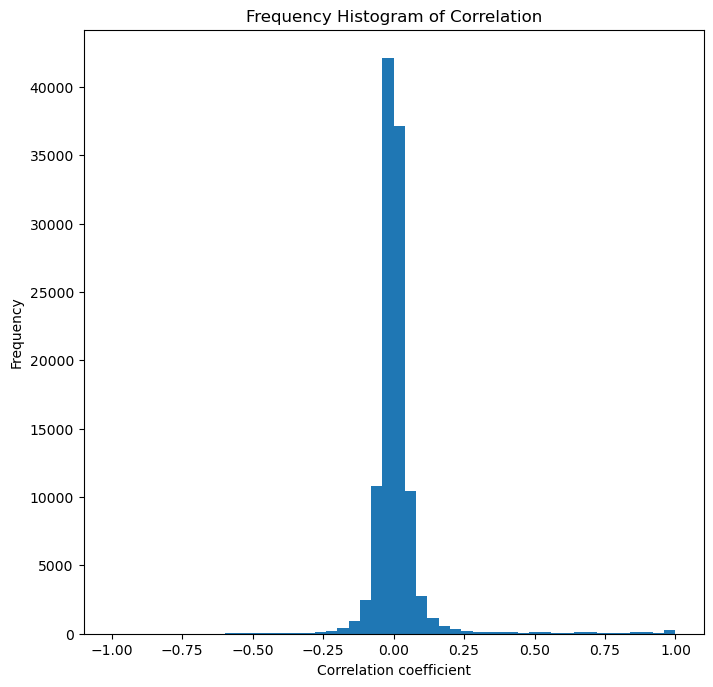

In [80]:
# Correlation Matrix
def correlation(df):
    cor_matrix = pd.DataFrame(df.corr())

    # Remove reuntant values by selecting only the upper correlation triangle
    upper_tri = pd.DataFrame(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool)))

    # Convert the upper correlation triangle to a Series
    corlist = pd.Series(upper_tri.values.ravel('F'))

    # Correlation Histogram
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    # Plot Histogram on x
    plt.hist(corlist, bins =50)
    plt.gca().set(title='Frequency Histogram of Correlation', ylabel='Frequency', xlabel='Correlation coefficient')

correlation(df)

### 2.8.Check duplicated

In [84]:
# duplicated rows
df.duplicated().sum()

0

### 2.9.Check Missing values

In [85]:
#Total numbe rof Nan values in the dataframe
df.isna().sum().sum()

41951

In [86]:
#number of cols with Nan values
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print('Nan_cols = ', len(nan_cols))

#number of rows with Nan values
nan_rows = df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows
print('Nan_rows = ', len(nan_rows))

Nan_cols =  538
Nan_rows =  1567


## 3.Data Prepration

### 2.3.Change 0 to pass, 1 to fail

In [ ]:
# change 0 to pass and 1 to fail in the target variable
dict_temp = {0:'pass' ,1:'fail'}
df['class'] = df['class'].map(dict_temp)

### 2.9.Splitting Traninig and Test Data 

In [43]:
# defining the target variable to get the same proportion defaults in both train and test dataset
y = df['class']
x = df.drop('class', axis=1)

In [44]:
# spliting the dataset with the proportion of 20% for testing and 80% for training
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2, random_state=40, shuffle=True, stratify=y)

## 3.Feature Removal

### 3.1.Constant

In [45]:
# getting the number of rows of the x_train and x_test
print(x_train.shape)
print(x_test.shape)

(1253, 590)
(314, 590)


In [46]:
# number of features with only one value and and missing value (100% constant, 0 variance)
len(x_train[x_train.columns[x_train.nunique() == 1]].columns)

116

In [47]:
# dropping the constant features from the x_train
x_train.drop(list(x_train[x_train.columns[x_train.nunique() == 1]].columns), axis = 1, inplace = True)

C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# getting the number of rows of the x_train
print(x_train.shape)

(1253, 474)


### 3.2.With more than a percentage of Na

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

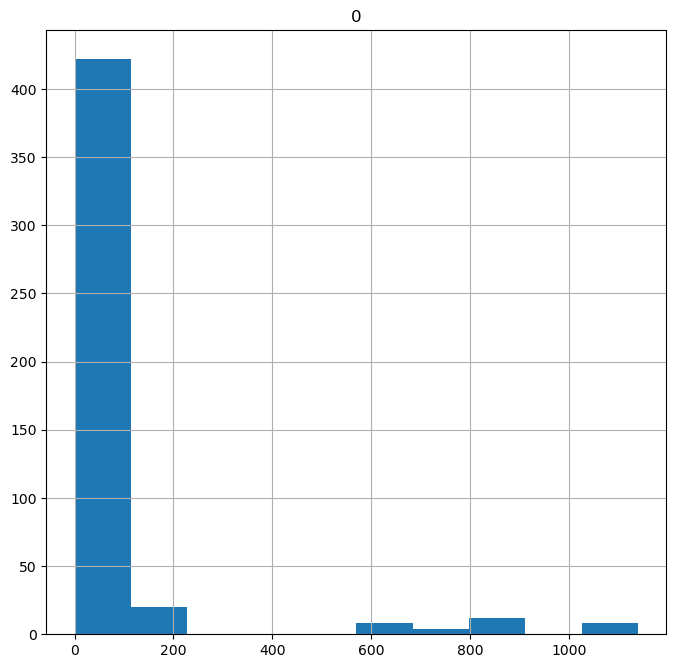

In [49]:
# counting number of missing values in each features
feature_train_na_sum = pd.DataFrame((x_train.isna()).sum())
# histogram of number of missing values in features
feature_train_na_sum.hist()

In [50]:
# selecting features containing more than a percentage of missing values
percentage_missing_remove = 55/100
feature_train_na_r = feature_train_na_sum[feature_train_na_sum[0]>=(len(x_train.loc[:,])*percentage_missing_remove)].index
# number of features containing more than 55% missing values
print(len(feature_train_na_r))

24


In [51]:
# dropping the features containing more than a percentage of missing values from the x_train
x_train.drop(feature_train_na_r, axis = 1, inplace = True)

C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 3.3.least volatile

In [52]:
# calculationg the standard deviation and the coefficient standard deviation of each features
summary_train = x_train.describe(include='all')
feature_train_std = pd.DataFrame(summary_train.loc['std',:])
feature_train_coeffstd = pd.DataFrame(summary_train.loc['std',:]/abs(summary_train.loc['mean',:]))

In [53]:
# the min and max of the standard deviation of features
print("Min train Std.",min(feature_train_std.iloc[:,0]))
print("Max train Std.",max(feature_train_std.iloc[:,0]))

Min train Std. 0.0001055328779148529
Max train Std. 6438.937158652618


In [54]:
# the min and max of the coefficient standard deviation of features
print("Min train Coef. Std.", min(feature_train_coeffstd.iloc[:,0]))
print("Max train Coef. Std.", max(feature_train_coeffstd.iloc[:,0]))

Min train Coef. Std. 0.0023114813081706598
Max train Coef. Std. 709.586291505058


In [55]:
# sorting features based on the coefficient standard deviation
feature_train_coeffstd_sort = feature_train_coeffstd.sort_values(by=[0])

<AxesSubplot:>

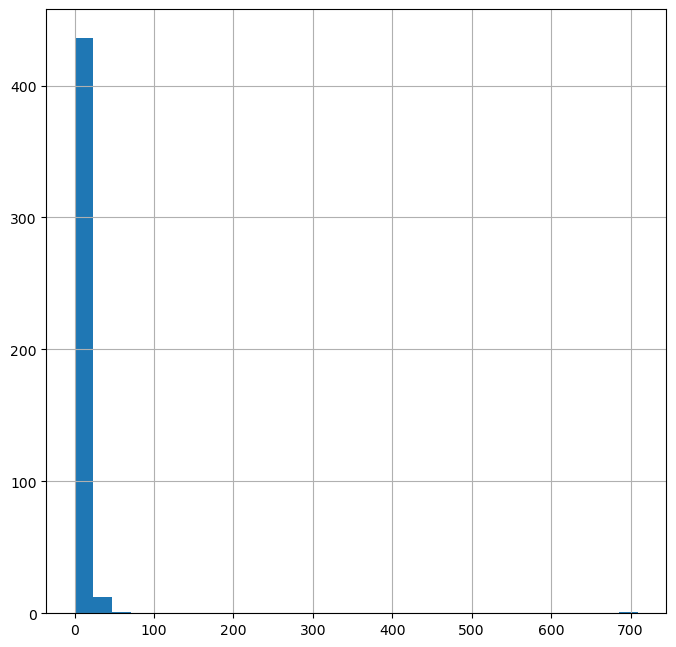

In [56]:
# histogram of the coefficient standard deviation of features
feature_train_coeffstd_sort.iloc[:,0].hist(bins=30)

<AxesSubplot:>

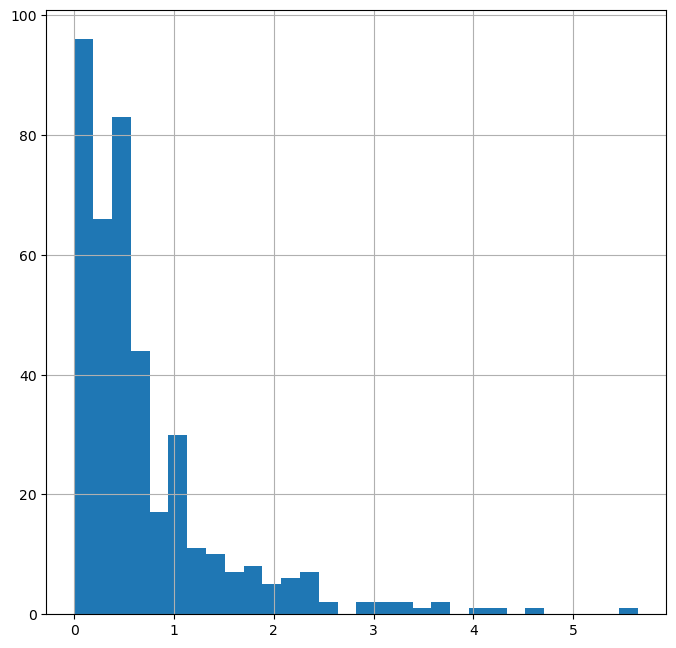

In [57]:
# histogram of the coefficient standard deviation of a percentage of features with the least coeffstd
percentage_features_train = int(len(feature_train_coeffstd_sort)*90/100)
feature_train_coeffstd_sort.iloc[0:percentage_features_train,0].hist(bins=30)

In [58]:
# a percentage of features with the least coeffstd to remove
percentageToAnalyze = 5

percentage_features_train_rm = int(len(feature_train_coeffstd_sort)*percentageToAnalyze/100)
feature_train_index = feature_train_coeffstd_sort.index
feature_train_least_volatiles = feature_train_index[0:percentage_features_train_rm+1]
print("Least Volatiles train", len(feature_train_least_volatiles))

Least Volatiles train 23


In [59]:
# dropping a percentage of features with the least coeffstd
x_train.drop(feature_train_least_volatiles, axis = 1, inplace = True)

## 4.Outlier Identification

In [60]:
# calculating the z score of the values
z_x_train = pd.DataFrame(stats.zscore(x_train,nan_policy='omit'))
z_x_train

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
0,0.122233,-0.137249,0.086025,-0.057430,0.814147,-0.020251,1.345737,-0.145969,0.083656,-0.747087,...,0.154118,-0.264419,0.063091,0.054366,0.053153,0.053074,-0.256815,-0.425326,-0.553038,-0.318940
1,-0.820960,-1.379534,0.101249,-0.033167,-0.570777,0.183135,-1.416011,-0.119892,-0.511804,-0.137567,...,2.551147,4.719447,5.854373,0.175189,0.053153,0.172917,-0.628903,1.951141,2.033549,1.458167
2,0.102402,-0.684294,1.463540,-0.051823,-0.913176,0.375816,0.967340,-0.504525,-1.011565,-0.478078,...,0.075405,-0.242386,-0.002108,-0.166269,-0.188836,-0.173306,1.746129,0.446444,0.794901,-0.561183
3,1.078329,-0.203744,2.468494,-0.050403,-2.023770,0.022567,-1.479985,0.910142,-0.416105,-0.209511,...,-0.162219,-0.243865,-0.190608,-0.034939,-0.067842,-0.033602,-0.209314,-0.150659,-0.261592,-0.214194
4,-0.049862,NaN,-0.548534,-0.050500,0.206569,0.097498,-1.063477,-0.028623,-0.043943,-0.518565,...,0.354613,-0.236076,0.515428,-0.092724,-0.116240,-0.092074,0.281526,-0.067064,-0.225161,-0.385468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,-0.838890,-0.520650,-0.150441,-0.052136,0.645995,0.343702,-0.196432,-1.482404,0.923680,1.106055,...,0.381345,-0.231513,-0.002336,0.001834,-0.116240,0.006195,0.289443,-1.249326,-1.245223,-0.802710
1249,-1.813187,-0.072854,2.187048,-0.052754,-2.546011,-0.138001,2.027666,3.191861,0.455818,-0.541730,...,-0.269150,-0.232421,-0.162124,-0.197788,-0.237234,-0.194325,1.437375,0.470328,0.867763,-0.507551
1250,-0.615180,-0.545370,-0.211335,-0.054830,-0.683406,-0.159410,-0.870195,-0.647947,-1.490060,-0.913816,...,0.581840,-0.250955,0.130227,-0.113737,-0.067842,-0.107726,-0.391400,1.760068,1.159209,0.909474
1251,-0.756306,-0.205969,-0.466076,-0.054908,0.219860,-0.277159,0.349384,-0.315468,-0.394839,-0.270124,...,-1.072615,-0.258033,-0.812900,-0.019179,-0.019444,-0.022890,-1.982671,-0.831355,-0.808054,1.825528


In [61]:
# calculating the number of outliers
print(sum(z_x_train.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0)))))

4724


## 5.Imputation outliers and missing values

### 5.1.Replacing Outliers with NA

In [62]:
# number of na values before replacing outliers with na
print(x_train.isna().sum().sum())

10888


In [63]:
# replacing outliers with NA to impute all NA values
is_outlier_train = abs(z_x_train)>3
is_outlier_train.columns = x_train.columns
is_outlier_train.index = x_train.index
x_train = x_train.mask(is_outlier_train, np.nan)

In [64]:
# number of na values after replacing outliers with na
print(x_train.isna().sum().sum())

15612


### 5.2.Imputation

In [ ]:
# KNN
imputer = KNNImputer(n_neighbors=5)

x_train_no_na = x_train.copy(deep=True)
x_train_no_na.iloc[:,:] = imputer.fit_transform(x_train)
x_train_no_na_knn = x_train_no_na.iloc[:,:]

In [70]:
# MICE
imputer = IterativeImputer(max_iter=5, random_state=0)

x_train_no_na = x_train.copy(deep=True)
x_test_no_na = x_test.copy(deep=True)
x_train_no_na.iloc[:,:] = imputer.fit_transform(x_train)
x_test_no_na.iloc[:,:] = imputer.fit_transform(x_test)
x_train_no_na_mice = x_train_no_na.iloc[:,:]
x_test_no_na_mice = x_test_no_na.iloc[:,:]

C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [71]:
# Number of na values after Imputation
print(x_train_no_na.isna().sum().sum())
print(x_test_no_na.isna().sum().sum())

0
0


60


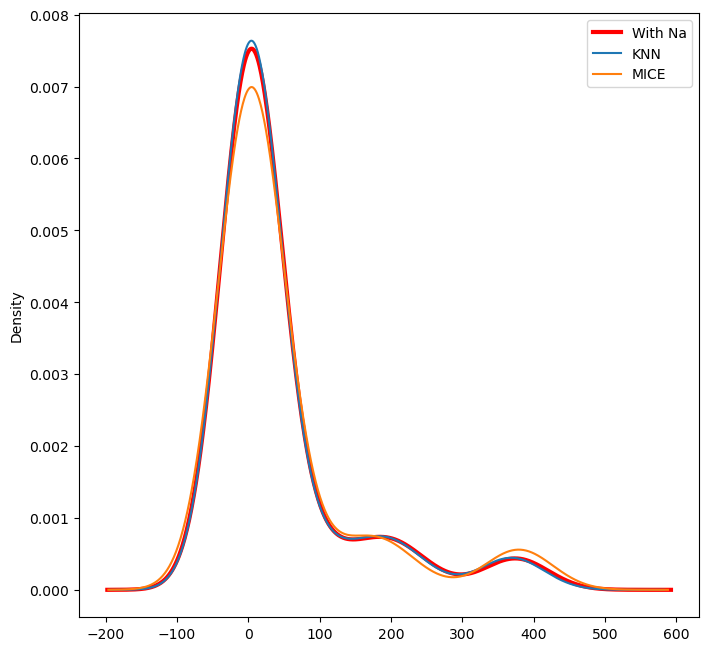

In [72]:
# plot the std of the features with more than 3% of missing values before and after imputation with knn and mice
feature_missing_sum = pd.DataFrame((x_train.isna()).sum())
percentage_missing_filter = 3/100
feature_filter = feature_missing_sum[feature_missing_sum[0]>=(len(x_train.loc[:,])*percentage_missing_filter)].index

print(len(feature_filter))

summary_with_na = x_train[feature_filter].describe(include='all')
feature_std_with_na = pd.DataFrame(summary_with_na.loc['std',:])
feature_std_sort_with_na = feature_std_with_na.sort_values(by=['std'])

summary_knn = x_train_no_na_knn[feature_filter].describe(include='all')
feature_std_knn = pd.DataFrame(summary_knn.loc['std',:])
feature_std_sort_knn = feature_std_knn.sort_values(by=['std'])

summary_mice = x_train_no_na_mice[feature_filter].describe(include='all')
feature_std_mice = pd.DataFrame(summary_mice.loc['std',:])
feature_std_sort_mice = feature_std_mice.sort_values(by=['std'])

feature_std_sort_with_na.iloc[:,0].plot(kind='kde',c='red',linewidth=3)
feature_std_sort_knn.iloc[:,0].plot(kind='kde')
feature_std_sort_mice.iloc[:,0].plot(kind='kde')
labels = ['With Na', 'KNN','MICE']
plt.legend(labels)

## 6.Feature Selection

### 6.1.BORUTA

In [73]:
# define random forest classifier
rfc = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rfc.fit(x_train_no_na, y_train)
# define Boruta feature selection method
feature_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
# find all relevant features
feature_selector.fit(x_train_no_na.to_numpy(),y_train)

# check ranking of features
feature_selector.ranking_

# check selected features
feature_selector.support_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	396
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	27
Rejected: 	396
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	27
Rejected: 	396
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	27
Rejected: 	396
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	24
Rejected: 	396
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	24
Rejected: 	396
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	23
Rejected: 	397
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	23
Rejected: 	397
Iteration: 	16 / 100
Confirmed: 	7
Tentat

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,

In [74]:
# call transform() on x_train_no_na to filter it down to selected features
x_train_filtered = pd.DataFrame(feature_selector.transform(x_train_no_na.to_numpy()))
x_train_filtered.columns = x_train_no_na.columns[feature_selector.support_]
x_train_filtered.index = x_train_no_na.index
x_train_filtered

,feature001,feature029,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature153,feature161,feature248,feature296,feature432,feature461,feature478,feature511,feature520
ID,,,,,,,,,,,,,,,,,,,,
567.0,3023.07,69.0667,8.5288,1.4845,18.5155,25.4260,-0.0146,0.455500,0.9649,2.888,0.6627,0.6900,374.0,0.019500,168.1031,13.6996,22.7157,2.3095,62.3288,4.272400
1261.0,2953.63,67.4222,9.0402,1.7273,18.2727,22.1740,-0.0124,0.457334,1.1540,2.627,0.7492,0.2493,227.0,0.042165,100.6525,8.9011,32.6879,3.4184,21.8402,9.250083
1041.0,3021.61,69.4222,8.8581,-3.7509,23.7509,30.7593,-0.0086,0.459972,1.8340,2.658,0.5042,0.9898,225.0,0.051081,97.2193,8.6034,21.7993,3.3690,39.7080,11.145033
1181.0,3093.46,68.1778,8.7782,1.3555,18.6445,22.2300,-0.0107,0.468000,1.0210,2.792,0.7931,0.9841,242.0,0.021000,106.9279,9.2676,36.7423,4.8659,20.4651,4.490400
611.0,3010.40,68.6444,8.5615,2.3900,17.6100,25.5921,-0.0095,0.461583,0.8845,2.748,0.8080,0.7259,418.0,0.046772,204.2392,15.7706,15.0259,2.9332,68.7831,10.007054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806.0,2952.31,67.4111,8.5862,-3.1227,23.1227,31.4849,-0.0111,0.442000,1.2390,2.511,0.6847,0.4626,1047.0,0.222300,434.9291,38.7634,16.1068,4.6652,45.9459,50.293500
1101.0,2880.58,72.7778,8.9818,0.1982,19.8018,23.4628,-0.0116,0.459626,1.4650,2.920,0.8037,0.4269,447.0,0.054846,206.0362,16.7588,18.7968,2.5177,33.6207,12.048561
1469.0,2968.78,70.3333,8.6384,1.2518,18.7482,24.1495,-0.0112,0.457966,1.3800,2.765,0.7248,0.5995,59.0,0.041752,32.6637,2.6616,31.6738,4.0841,50.7795,9.530262


In [75]:
# filter test down to selected features
x_test_filtered = x_test_no_na[x_train_filtered.columns]
x_test_filtered

,feature001,feature029,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature153,feature161,feature248,feature296,feature432,feature461,feature478,feature511,feature520
ID,,,,,,,,,,,,,,,,,,,,
766.0,2939.40,71.2889,8.7073,-0.2418,20.2418,24.7587,-0.0099,0.464100,1.0590,2.915,0.7697,0.659900,591.0,0.031600,244.8106,20.8815,18.7707,6.9587,57.7947,6.819300
1231.0,3045.98,72.4667,8.8355,4.6891,15.3109,14.6060,-0.0088,0.456049,1.1350,2.545,0.7284,0.491300,328.0,0.053407,153.2971,12.7478,53.9906,6.0446,52.4964,11.446322
723.0,3056.40,74.1333,8.3436,1.7618,18.2382,23.5304,-0.0101,0.456400,0.9554,2.864,0.7585,0.477900,650.0,0.019800,266.3136,21.5178,10.7413,5.5131,45.6576,4.329800
1470.0,2898.17,68.0889,9.7137,0.0064,19.9936,23.1671,-0.0126,0.464306,1.2200,2.897,0.8522,0.210300,95.0,0.049300,43.8824,3.7721,37.5476,6.8544,27.8884,10.896866
401.0,2951.56,67.6778,8.6013,4.5027,15.4973,22.3374,-0.0057,0.455800,1.3470,2.481,0.6834,1.376700,314.0,0.014200,137.3132,12.1741,17.4238,5.7879,54.0305,3.109100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28.0,2988.99,62.8889,8.9336,17.3873,22.6127,27.4102,-0.0078,0.476000,0.9554,3.002,0.6287,-0.185752,420.0,0.033200,177.2362,15.3734,30.4356,5.7628,69.6774,6.975700
584.0,2949.82,67.4222,8.7994,11.2909,8.7091,13.8957,-0.0111,0.459100,1.1350,2.467,0.6802,0.471300,517.0,0.031200,232.9440,19.3000,14.2373,10.7271,39.5062,6.793900
953.0,3071.15,72.7667,8.6695,0.4200,19.5800,26.5186,-0.0087,0.459000,1.1820,2.735,0.8349,0.274300,276.0,0.018800,114.3343,10.6625,29.9729,6.8146,50.4298,4.102700


### 6.2.Overview of remaining features

In [76]:
# a summary of statistics pertaining to the DataFrame columns
x_train_filtered.describe()

,feature001,feature029,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature153,feature161,feature248,feature296,feature432,feature461,feature478,feature511,feature520
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,3012.629912,69.503621,8.823868,2.737731,20.504465,26.637356,-0.009805,0.462012,1.183260,2.731059,0.746615,0.606008,487.979380,0.046713,217.308537,17.692003,29.056734,5.668814,52.280245,10.096315
std,68.756816,3.469217,0.399677,8.158165,4.925493,8.971380,0.002825,0.005811,0.267029,0.204481,0.080886,0.493604,360.475590,0.037382,159.875601,12.491655,12.250598,2.406721,24.439255,8.059090
min,2816.810000,59.888900,7.603200,-21.205500,6.448200,-208.814491,-0.018500,0.398900,0.605500,2.340000,0.501300,0.154400,28.000000,0.000000,13.622900,1.239100,7.953400,-16.903573,0.000000,0.000000
25%,2967.540000,67.388900,8.578800,-1.890000,17.362700,22.997000,-0.011800,0.459300,0.974400,2.571000,0.688700,0.371800,293.000000,0.025100,130.220300,11.056900,20.363900,4.091100,35.320100,5.429400
50%,3011.483066,69.144400,8.769952,0.853600,20.018200,26.247000,-0.010100,0.461965,1.144000,2.734000,0.758600,0.469700,433.000000,0.042479,193.904600,16.141600,26.311100,5.259700,47.222200,9.261031
75%,3054.810000,72.266700,9.035500,4.381800,22.861800,29.921200,-0.008100,0.465000,1.338000,2.857000,0.818700,0.693900,607.000000,0.049718,268.815900,21.264700,35.748700,6.679000,63.440900,10.815549
max,3232.640000,77.344400,10.963400,29.750900,48.193622,52.602037,-0.000700,0.488500,2.022000,3.463000,0.888400,5.865800,3354.419152,0.265031,1493.357605,119.356000,90.520662,23.100200,160.493800,59.664900


<AxesSubplot:>

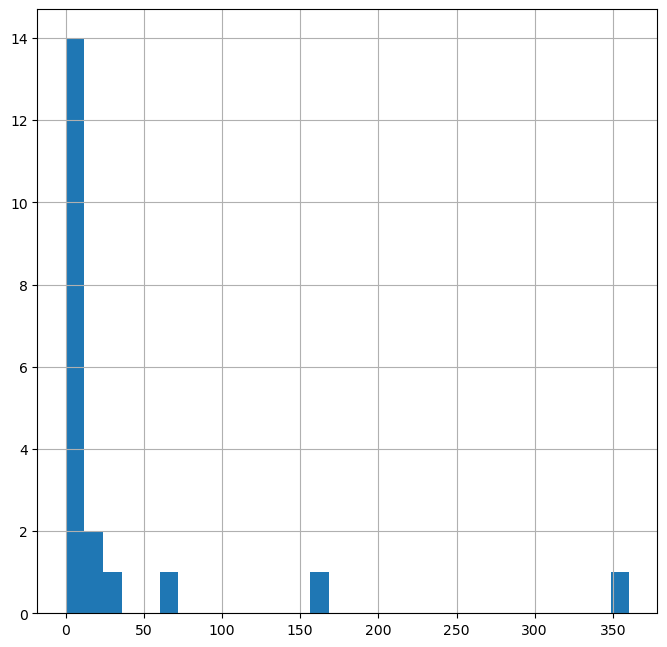

In [77]:
# histogram of the std of the remaing features
summary = x_train_filtered.describe(include='all')
feature_std = pd.DataFrame(summary.loc['std',:])
feature_std_sort = feature_std.sort_values(by=['std'])
feature_std_sort.iloc[:,0].hist(bins=30)

[Text(0.5, 1.0, 'Frequency Histogram of Correlation'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Correlation coefficient')]

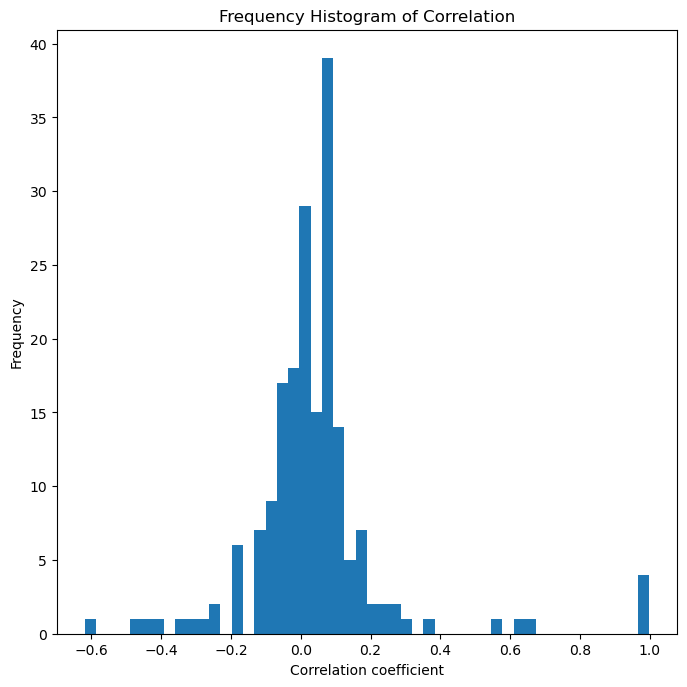

In [78]:
# Correlation Matrix
cor_matrix = pd.DataFrame(x_train_filtered.corr())

# Remove reuntant values by selecting only the upper correlation triangle
upper_tri = pd.DataFrame(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)))

# Convert the upper correlation triangle to a Series
corlist = pd.Series(upper_tri.values.ravel('F'))

# Correlation Histogram
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(corlist, bins =50)
plt.gca().set(title='Frequency Histogram of Correlation', ylabel='Frequency', xlabel='Correlation coefficient')

In [79]:
# Correlation of the remaining features
corr = pd.DataFrame(x_train_filtered.corr())
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,feature001,feature029,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature153,feature161,feature248,feature296,feature432,feature461,feature478,feature511,feature520
feature001,1.00,0.03,-0.04,-0.09,-0.03,-0.00,-0.06,-0.06,0.02,0.00,0.02,-0.06,0.03,-0.04,0.03,0.03,0.01,0.00,-0.05,-0.03
feature029,0.03,1.00,-0.40,-0.29,-0.13,-0.13,-0.36,-0.17,0.18,0.07,-0.05,-0.18,-0.11,-0.18,-0.12,-0.09,-0.05,-0.11,-0.30,-0.18
feature034,-0.04,-0.40,1.00,0.15,0.08,0.08,0.13,0.16,-0.10,-0.00,0.03,0.02,0.03,0.08,0.03,0.02,0.07,0.08,0.08,0.08
feature060,-0.09,-0.29,0.15,1.00,-0.45,-0.26,0.35,0.18,-0.18,-0.01,0.05,0.19,0.07,0.24,0.07,0.05,0.07,0.21,0.29,0.23
feature065,-0.03,-0.13,0.08,-0.45,1.00,0.55,0.13,0.12,0.00,0.00,0.01,-0.04,-0.02,0.10,-0.02,-0.01,0.07,-0.07,0.09,0.08
feature066,-0.00,-0.13,0.08,-0.26,0.55,1.00,0.10,0.09,-0.04,0.02,0.03,-0.02,-0.01,-0.05,-0.01,-0.01,-0.00,0.19,0.11,0.08
feature104,-0.06,-0.36,0.13,0.35,0.13,0.10,1.00,0.16,-0.24,0.00,0.07,0.09,0.11,0.28,0.12,0.10,0.03,0.14,0.63,0.27
feature113,-0.06,-0.17,0.16,0.18,0.12,0.09,0.16,1.00,-0.04,-0.02,0.00,0.11,0.09,-0.06,0.09,0.07,0.08,0.08,0.16,-0.09
feature126,0.02,0.18,-0.10,-0.18,0.00,-0.04,-0.24,-0.04,1.00,-0.49,-0.62,-0.07,-0.06,-0.11,-0.06,-0.06,0.09,-0.07,-0.19,-0.11
feature127,0.00,0.07,-0.00,-0.01,0.00,0.02,0.00,-0.02,-0.49,1.00,0.65,-0.01,-0.01,0.00,-0.01,-0.00,-0.09,-0.06,0.01,0.01


## 7.Modeling

### 7.1.Balancing

In [80]:
# transform the dataset
oversample = SMOTE()
x_balance , y_balance = oversample.fit_resample(x_train_filtered, y_train)

In [81]:
# summarize the new class distribution
counter = Counter(y_balance)
print(counter)

Counter({'pass': 1177, 'fail': 1177})


### 7.2.Scaling

### 7.3.Model Building


In [82]:
# define random forest classifier
rfc = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
# fit the model
rfc.fit(x_balance, y_balance)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [83]:
# calculate predicted y of the test
y_pred = rfc.predict(x_test_filtered)

## 8.Evaluation

In [86]:
# calculate accuracy
accuracy_score(y_test, y_pred)

0.7993630573248408

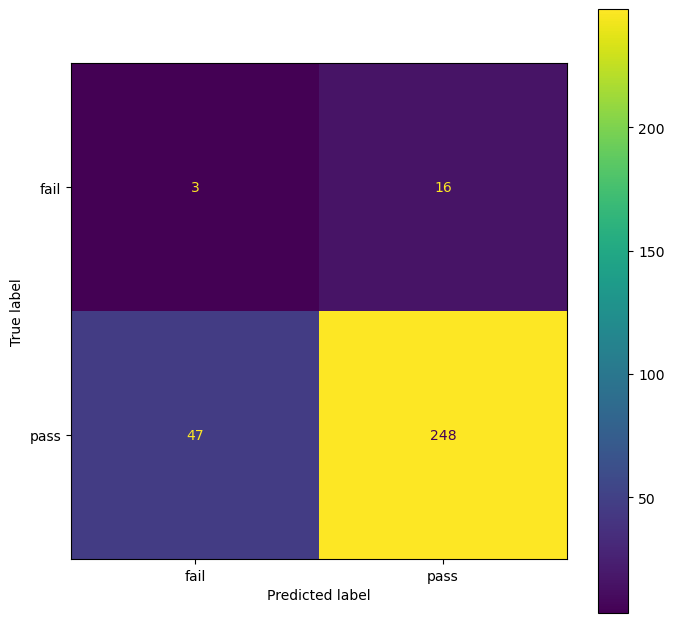

In [87]:
# plot confusion matrix
plot_confusion_matrix(rfc, x_test_filtered, y_test)